### Basic example on how to use OMERO Python language bindings
See https://docs.openmicroscopy.org/latest/omero/developers/Python.html

### Install dependencies if required
The cell below will install dependencies if you choose to run the notebook in [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true).

In [1]:
# %pip install omero-py

### Import Packages required to connect to OMERO

In [30]:
from omero.gateway import BlitzGateway
from getpass import getpass
import ezomero
import matplotlib.pyplot as plt

In [26]:
HOST = 'omero-int.biotec.tu-dresden.de'
image_id = 178 # blobs
image_id = 416 # large image
dataset_id = 152 # sample dataset

In [4]:
conn = ezomero.connect(host=HOST, user=input("Username: "),
               password=getpass("OMERO Password: "), port=4064)

Username:  mazo260d
OMERO Password:  ········
Enter group name (or leave blank for default group):  


In [27]:
omero_image, image = ezomero.get_image(conn, image_id, no_pixels=True) # shape follows TZYXC

In [45]:
image_shape = (omero_image.getSizeT(), omero_image.getSizeZ(), omero_image.getSizeY(), omero_image.getSizeX(), omero_image.getSizeC())
image_shape

(1, 1, 18549, 22194, 1)

In [41]:
omero_image, image = ezomero.get_image(conn, image_id,
                                       start_coords=(5000, 5000, 0, 0, 0),
                                       axis_lengths=(10, 10, 1, 1, 1)) # assumes XYZCT ordering

In [49]:
parent_dataset_id = omero_image.getAncestry()[0].id
parent_dataset_id

179

In [42]:
image.shape

(1, 1, 10, 10, 1)

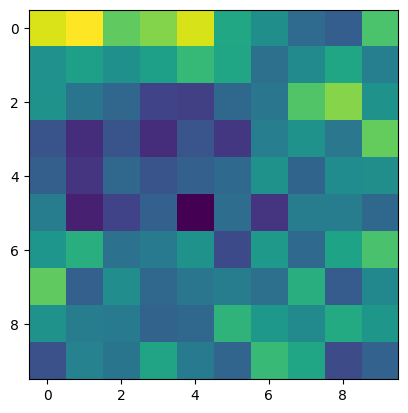

In [43]:
plt.imshow(image[0,0,:,:,0])

In [50]:
ezomero.post_image(conn, image, image_name='crop', dataset_id=parent_dataset_id)

2847

In [51]:
conn.close()

### Create a connection to an OMERO server

In [3]:
def connect(hostname, username, password):
    """
    Connect to an OMERO server
    :param hostname: Host name
    :param username: User
    :param password: Password
    :return: Connected BlitzGateway
    """
    conn = BlitzGateway(username, password,
                        host=hostname, secure=True)
    conn.connect()
    conn.c.enableKeepAlive(60)
    return conn

HOST = 'wss://workshop.openmicroscopy.org/omero-ws'
HOST = 'omero-int.biotec.tu-dresden.de'
conn = connect(HOST, input("Username: "),
               getpass("OMERO Password: "))
print("Connected as {}".format(conn.getUser().getName()))

Username:  mazo260d
OMERO Password:  ········


AttributeError: '_BlitzGateway' object has no attribute '_ctx'

### Load images in a specified dataset method

In [6]:
def load_images(conn, dataset_id):
    """
    Load the images in the specified dataset
    :param conn: The BlitzGateway
    :param dataset_id: The dataset's id
    :return: The Images or None
    """
    dataset = conn.getObject("Dataset", dataset_id)
    images = []
    for image in dataset.listChildren():
        images.append(image)
    if len(images) == 0:
        return None

    for image in images:
        print("---- Processing image", image.id)
    return images

images = load_images(conn, input("Dataset ID: "))
print(images[0].id)

Dataset ID:  152


---- Processing image 178
---- Processing image 2846
---- Processing image 179
---- Processing image 180
---- Processing image 199
178


In [19]:
omero_image, image = ezomero.get_image(conn, image_id, no_pixels=True)

In [22]:
omero_image.getS

22194

In [15]:
if omero_image:
    print(omero_image)

In [16]:
print(omero_image)

None


In [7]:
images[0]

<_ImageWrapper id=178>

In [ ]:
ezomero.get_image(

### Close the connection to the OMERO server

In [8]:
conn.close()

## Alternative with ezomero

In [5]:
conn.close()

AttributeError: 'NoneType' object has no attribute 'close'

### License (BSD 2-Clause)
Copyright (C) 2019-2021 University of Dundee. All Rights Reserved.

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.